In [1]:
%load_ext autoreload
%autoreload 2
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

# Librosa Libraries
import librosa
import librosa.display
import IPython.display as ipd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sys
sys.path.append('../easy_gold')

import utils
import datasets

In [8]:
pd.set_option('display.max_columns', 60)

In [74]:
df_am = pd.read_csv('../data/external/train_extended_am.csv')
df_nz = pd.read_csv('../data/external/train_extended_nz.csv')

In [75]:
print(df_am.shape)
print(df_nz.shape)

(23620, 29)
(23620, 29)


In [76]:
# df_am.head()

In [77]:
# df_nz.head()

In [78]:
df_am[df_am[['ebird_code', 'filename']].duplicated()]

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license


In [79]:
df_nz[df_nz[['ebird_code', 'filename']].duplicated()]

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,bitrate_of_mp3,file_type,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license


In [80]:
df_am.equals(df_nz)

True

In [81]:
df_org = pd.read_csv('../data/train.csv')

In [82]:
all_df = pd.concat([df_org, df_am])

In [83]:
all_df.shape

(44995, 35)

In [86]:
all_df = all_df.drop(all_df[all_df.duration==0].index)

In [88]:
all_df.shape

(44868, 35)

In [89]:
# all_df.head()

In [90]:
all_df.reset_index(inplace=True)

In [91]:
all_df.to_csv('../data/train_with_external.csv', index=False)

In [38]:
all_df[all_df[['ebird_code', 'filename']].duplicated()]

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license


In [23]:
train_external_df = pd.concat([df_am, df_nz])

In [27]:
train_external_df.shape

(47240, 29)

In [25]:
train_external_df[train_external_df[['ebird_code', 'filename']].duplicated()][['ebird_code', 'filename']]

,ebird_code,filename
0,aldfly,XC554809.mp3
1,aldfly,XC552408.mp3
2,aldfly,XC544552.mp3
3,aldfly,XC544551.mp3
4,aldfly,XC544550.mp3
...,...,...
23615,yetvir,XC558915.mp3
23616,yetvir,XC579823.mp3
23617,yetvir,XC574737.mp3
23618,yetvir,XC573213.mp3


In [39]:
df_org.data_type

AttributeError: 'DataFrame' object has no attribute 'data_type'

In [49]:
import shutil
from tqdm import tqdm

In [52]:
source_dir = Path('../data/external/all_resampled/')
target_dir = Path('../data/train_resampled_with_external/')

In [53]:
for bird_dir in tqdm(source_dir.iterdir()):
    for source_path in bird_dir.glob('*'):
#         print(source_path)
        ebird_code = source_path.parent.name
        target_path = target_dir / ebird_code / source_path.name
#         print(target_path)
        shutil.copy(source_path, target_path)
#     print(bird_dir.name)
#     target_path = target_dir / bird_dir.name
    

259it [05:03,  1.17s/it]


In [100]:
y, sr = librosa.load('../data/external/all_resampled/aldfly/XC133197.wav')

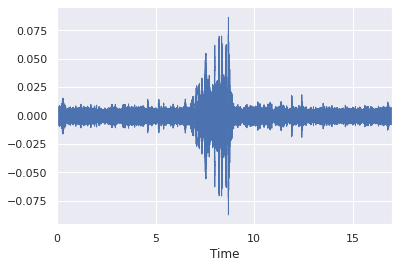

In [103]:
librosa.display.waveplot(y, sr=sr)

In [104]:
ipd.Audio(y, rate=sr)